# Vessels

## About

Exploring using schema.org to describe research vessels.  Note that schema.org
is a very broad vocabulary and as such specific concepts like research vessel is
not well aligned.

One approach we can use, however, is to leverage schema.org a a discovery layer
and link more directly to detailed institutional metadata records.  


```{literalinclude} ./graphs/ship.json
:linenos:
```

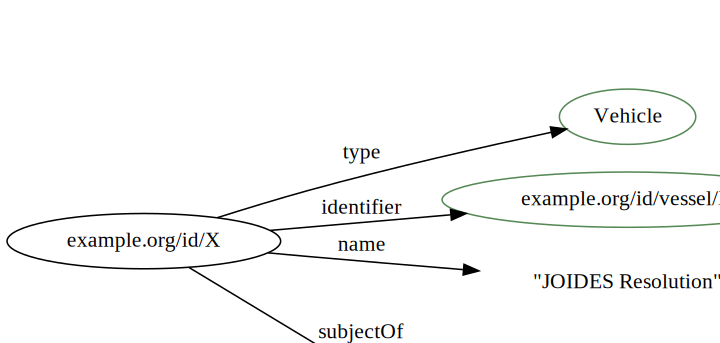

In [1]:
import json
from pyld import jsonld
import jbutils

with open("./graphs/ship.json") as dgraph:
    doc = json.load(dgraph)

context = {
    "@vocab": "https://schema.org/",
}

compacted = jsonld.compact(doc, context)
jbutils.show_graph(compacted)

### Details: Authoritative Reference

For each profile there are a few key elements we need to know about.  One
key element is what the authoritative reference or canonical identifier is for 
a resource.

{
    "@context": {
        "@vocab": "https://schema.org/"
    },
    "@id": "https://example.org/id/X",
    "@type": "Vehicle",
    "identifier": {
        "@id": "https://example.org/id/vessel/X",
        "@type": "PropertyValue",
        "description": "Vessel ID ",
        "propertyID": "https://en.wikipedia.org/wiki/IMO_number",
        "url": "https://example.org/id/vessel/X"
    }
}


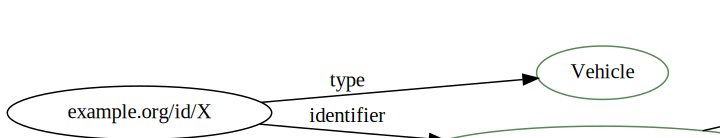

In [2]:
import json
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph
from pyld import jsonld
import graphviz
import jbutils

with open("./graphs/ship.json") as dgraph:
    doc = json.load(dgraph)

frame = {
  "@context": {"@vocab": "https://schema.org/"},
  "@explicit": "true",
  "@requireAll": "true",
  "@type":     "Vehicle",
  "identifier": ""
}

context = {
    "@vocab": "https://schema.org/",
}

compacted = jsonld.compact(doc, context)

framed = jsonld.frame(compacted, frame)
jd = json.dumps(framed, indent=4)
print(jd)

jbutils.show_graph(framed)

## References

* [ICES](https://ocean.ices.dk/codes/ShipCodes.aspx)
* POGO
* EurOcean
* https://vocab.nerc.ac.uk/search_nvs/C17/
* [SeaDataNet](https://www.seadatanet.org/)
* [Marine Facilities Planner](https://www.marinefacilitiesplanning.com/)
* [EuroFleets](https://www.eurofleets.eu/)
* Identifiers to use include NOCD Code, Call Sign, ICES Shipcode, MMSI Code, IMO Code